In [1]:
%pylab inline

import pandas as pd
import itertools as it

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("../data/raw/sp500-global.csv", index_col="Date")

In [11]:
data.sort_index(inplace=True)
data.index = pd.DatetimeIndex(data.index)
to_drop = ["Year", "Month", "Day", "class"]
df = data.drop(columns=to_drop).filter(like="lag", axis=1)
df.insert(0, "Return_GSPC", data.Return_GSPC)
print df.index[0], df.index[-1]
df.describe()

2004-02-06 00:00:00 2018-03-22 00:00:00


,Return_GSPC,rsi_lag1,williams_r_lag1,cci_symbol_lag1,roc_lag1,mom_lag1,lag1_varprice,lag2_varprice,returnlag1_DJI,returnlag2_DJI,...,returnlag1_Golddata,returnlag2_Golddata,returnlag1_DXY,returnlag2_DXY,returnlag1_VIX,returnlag2_VIX,returnlag1_VXN,returnlag2_VXN,returnlag1_VXO,returnlag2_VXO
count,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,...,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000
mean,0.030716,54.387942,0.381384,25.160435,0.000247,0.445841,0.031476,0.031292,0.029930,0.029889,...,0.040524,0.040148,0.003942,0.004126,0.266521,0.267906,0.186155,0.186618,0.339654,0.340067
std,1.163341,11.059471,0.312774,108.598079,0.011641,15.157980,1.162559,1.162644,1.078400,1.078410,...,1.170499,1.170473,0.683183,0.683094,7.578482,7.578542,6.328629,6.328652,8.534074,8.534170
min,-9.034978,16.457584,0.000000,-401.396755,-0.094695,-113.189942,-9.034978,-9.034978,-7.873277,-7.873277,...,-9.150114,-9.150114,-14.267594,-14.267594,-29.572651,-29.572651,-26.878610,-26.878610,-31.715458,-31.715458
25%,-0.390340,46.291741,0.093289,-56.641942,-0.003906,-5.880005,-0.389790,-0.390340,-0.385755,-0.385755,...,-0.518958,-0.519382,-0.186862,-0.186284,-3.843312,-3.843312,-3.328221,-3.328221,-4.295360,-4.295360
50%,0.063511,55.350932,0.305007,53.898311,0.000642,0.989990,0.064183,0.064183,0.050185,0.050185,...,0.020638,0.020477,0.000000,0.000000,-0.532524,-0.530847,-0.500590,-0.500590,-0.517978,-0.517978
75%,0.525162,62.799537,0.649847,109.137378,0.005238,7.779937,0.525162,0.525162,0.502117,0.502117,...,0.640529,0.640074,0.191094,0.191094,3.369162,3.369162,3.039178,3.039178,4.022796,4.022796
max,11.580037,86.686650,1.000000,286.419348,0.109572,104.130005,11.580037,11.580037,11.080332,11.080332,...,7.080884,7.080884,18.200541,18.200541,115.597933,115.597933,59.825750,59.825750,113.674191,113.674191


In [4]:
gr = df.groupby(pd.cut(df.index, bins=df.index[::5]))

In [5]:
# df.corrwith(df.Return_GSPC)
binned_correlations = gr.apply(lambda df: df.corrwith(df.Return_GSPC))

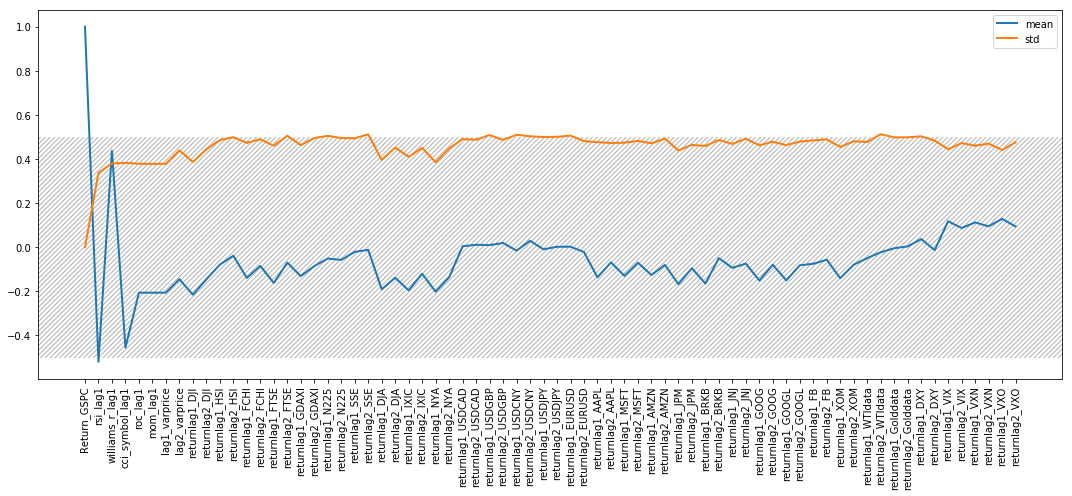

In [6]:
stats = binned_correlations.agg(["mean", "std"]).transpose()
xvals = arange(stats.index.size)

fig, ax = subplots(1,1, figsize=(15,7))
stats.plot(x=xvals, ax=ax, lw=2)
ax.axhspan(-0.5, +0.5, color="0.7", fc="none", hatch="/////", lw=0.0)
ax.set_xticks(xvals)
ax.set_xticklabels(stats.index.values, rotation=90)
fig.tight_layout()
fig.savefig("../data/img/sp500-feature-correlations.png")

In [7]:
filtered_columns = df.columns[np.abs(stats["mean"])>0.2]
filtered_df = data[to_drop+list(filtered_columns)]
filtered_df.head()

,Year,Month,Day,class,Return_GSPC,rsi_lag1,williams_r_lag1,cci_symbol_lag1,roc_lag1,mom_lag1,lag1_varprice,returnlag1_DJI,returnlag1_NYA
Date,,,,,,,,,,,,,
2004-02-06,2004,2,6,UP,1.255553,48.009447,0.811819,-64.825344,0.001836,2.069946,0.183747,0.236942,0.278569
2004-02-09,2004,2,2,DOWN,-0.258143,55.710720,0.382424,30.599403,0.012477,14.170044,1.255553,0.928779,1.350647
2004-02-10,2004,2,3,UP,0.502714,53.920045,0.471817,55.755973,-0.002585,-2.949951,-0.258143,-0.132162,0.137952
2004-02-11,2004,2,4,UP,1.066743,56.823082,0.298181,74.506240,0.005015,5.729980,0.502714,0.329135,0.530280
2004-02-12,2004,2,5,DOWN,-0.488013,62.280729,0.030951,154.528923,0.010611,12.219971,1.066743,1.166877,1.108422


In [8]:
filtered_df.reset_index().to_csv("../data/processed/sp500-filtered-global.csv", index=False)